# Startup Data Analysis

This notebook will explore the startup dataset and find interesting patterns

## Setting Up

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Setting plotting style
plt.style.use('ggplot')
sns.set_palette("husl")
%matplotlib inline

## Loading Data

In [ ]:
# Load the dataset
df = pd.read_csv('data/processed/processed_startups_data.csv')

# Check basic info
print(f"Total number of startups: {len(df)}")
print(f"\nColumns in dataset: {df.shape[1]}")
print(f"\nColumn names:")
print(df.columns.tolist())

Total number of startups: 62497

Columns in dataset: 11

Column names:
['name', 'category', 'country_code', 'region', 'city', 'status', 'funding_total_usd', 'funding_rounds', 'founded_at', 'first_funding_at', 'last_funding_at']


In [3]:
# Show first few rows
df.head(10)

,name,category,country_code,region,city,status,funding_total_usd,funding_rounds,founded_at,first_funding_at,last_funding_at
0,#fame,Media & Entertainment,IND,Mumbai,Mumbai,operating,10000000.0,1,2013-10-16,2015-01-05,2015-01-05
1,"(THE) ONE of THEM,Inc.",Technology,Unknown,Unknown,Unknown,operating,3406878.0,1,2012-05-13,2014-01-30,2014-01-30
2,0-6.com,Technology,CHN,Beijing,Beijing,operating,2000000.0,1,2007-01-01,2008-03-19,2008-03-19
3,004 Technologies,Technology,USA,"Springfield, Illinois",Champaign,operating,925124.5,1,2010-01-01,2014-07-24,2014-07-24
4,01Games Technology,Media & Entertainment,HKG,Hong Kong,Hong Kong,operating,41250.0,1,2013-04-11,2014-07-01,2014-07-01
5,Ondine Biomedical Inc.,Health & Biotechnology,CAN,Vancouver,Vancouver,operating,762851.0,2,1997-01-01,2009-09-11,2009-12-21
6,H2O.ai,Analytics & Data,USA,SF Bay Area,Mountain View,operating,33600000.0,4,2011-01-01,2013-01-03,2015-11-09
7,"1,2,3 Listo",E-Commerce & Retail,CHL,Santiago,Las Condes,operating,40000.0,1,2012-01-01,2013-02-18,2013-02-18
8,1-4 All,Media & Entertainment,USA,NC - Other,Connellys Springs,operating,500000.0,1,2012-01-31,2013-04-21,2013-04-21
9,1.618 Technology,Real Estate & Construction,USA,Orlando,Orlando,operating,400000.0,1,2013-12-07,2014-01-22,2014-01-22


In [4]:
# Check data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62497 entries, 0 to 62496
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               62497 non-null  object 
 1   category           62497 non-null  object 
 2   country_code       62497 non-null  object 
 3   region             62497 non-null  object 
 4   city               62497 non-null  object 
 5   status             62497 non-null  object 
 6   funding_total_usd  62497 non-null  float64
 7   funding_rounds     62497 non-null  int64  
 8   founded_at         62497 non-null  object 
 9   first_funding_at   62497 non-null  object 
 10  last_funding_at    62497 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 5.2+ MB


In [5]:
# Basic statistics
df.describe()

,funding_total_usd,funding_rounds
count,6.249700e+04,62497.000000
mean,1.558193e+07,1.713554
std,1.722865e+08,1.339094
min,1.000000e+00,1.000000
25%,4.484360e+05,1.000000
50%,1.500000e+06,1.000000
75%,7.824999e+06,2.000000
max,3.007950e+10,19.000000


**Observations:**

(write your observations here)

## Checking Company Status

**Goal:** We want to see how many companies are still working, how many closed, how many got acquired and how many went for IPO

In [6]:
# Count different status
status_counts = df['status'].value_counts()
print(status_counts)
print(f"\nPercentage:")
print(df['status'].value_counts(normalize=True) * 100)

status
operating    49944
closed        5783
acquired      5272
ipo           1498
Name: count, dtype: int64

Percentage:
status
operating    79.914236
closed        9.253244
acquired      8.435605
ipo           2.396915
Name: proportion, dtype: float64


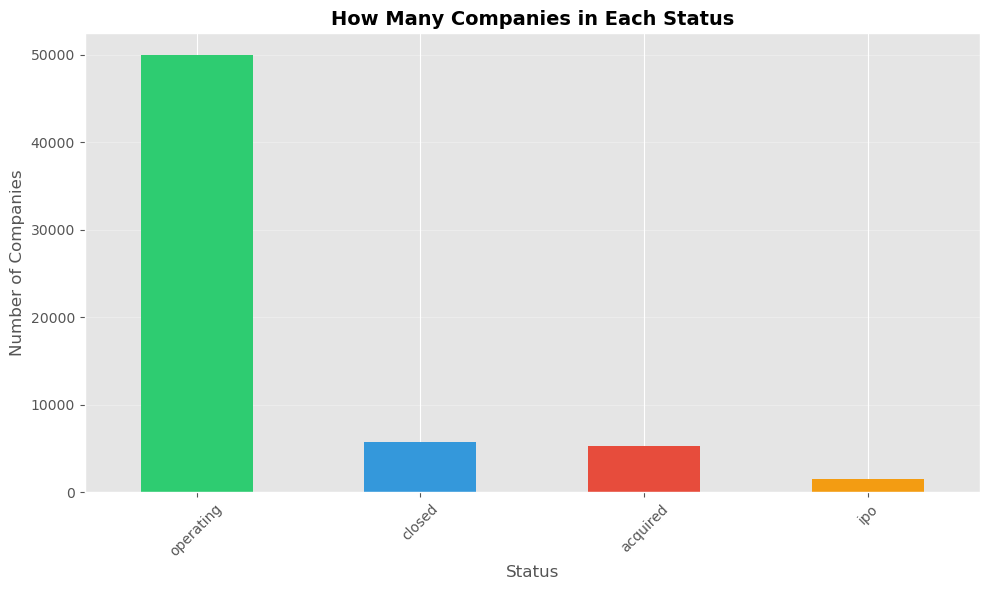

In [7]:
# Visualization 1: Bar chart of company status
plt.figure(figsize=(10, 6))
status_counts.plot(kind='bar', color=['#2ecc71', '#3498db', '#e74c3c', '#f39c12'])
plt.title('How Many Companies in Each Status', fontsize=14, fontweight='bold')
plt.xlabel('Status', fontsize=12)
plt.ylabel('Number of Companies', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

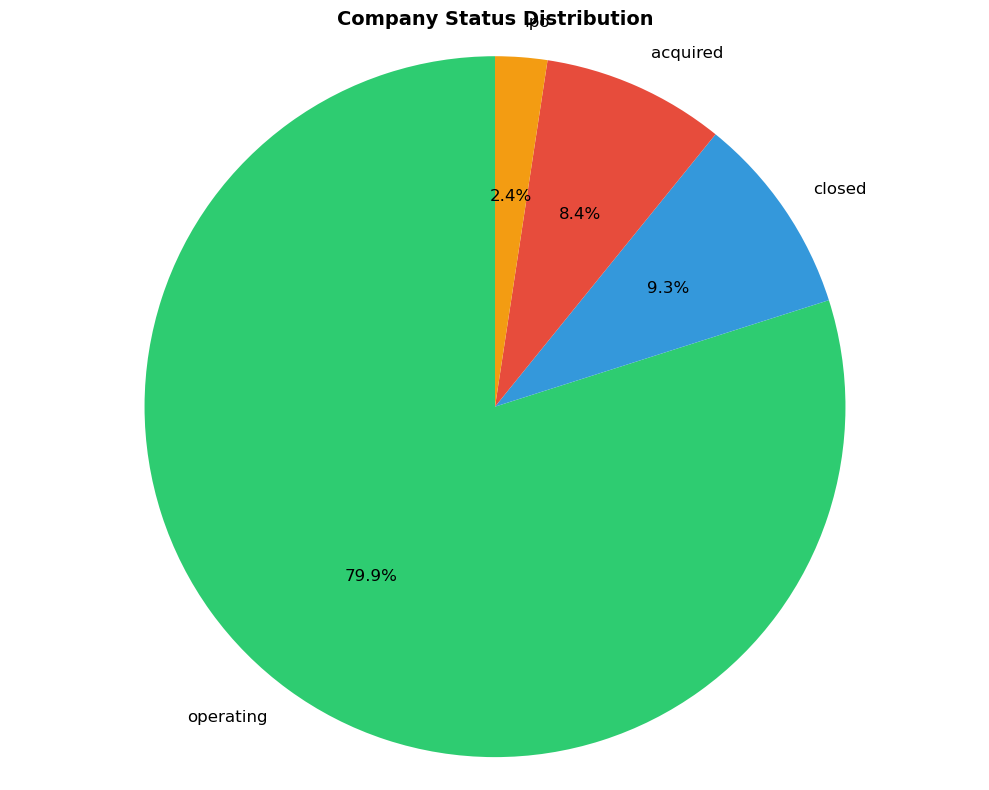

In [8]:
# Visualization 2: Pie chart of company status
plt.figure(figsize=(10, 8))
colors = ['#2ecc71', '#3498db', '#e74c3c', '#f39c12']
plt.pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=colors, textprops={'fontsize': 12})
plt.title('Company Status Distribution', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

## Looking at Categories

**Goal:** We want to find which type of business is most common in our data

In [9]:
# Top 15 categories
top_categories = df['category'].value_counts().head(15)
print("Top 15 Categories:")
print(top_categories)

Top 15 Categories:
category
Technology                    16305
Health & Biotechnology         8625
E-Commerce & Retail            4583
Media & Entertainment          4362
Unknown                        3026
Marketing & Advertising        2792
Analytics & Data               2630
Business Services              2614
Finance & FinTech              2510
Manufacturing & Industrial     2482
Other                          2097
Energy & Clean Tech            2003
Social & Communication         1737
Education & EdTech             1703
Food & Hospitality             1575
Name: count, dtype: int64


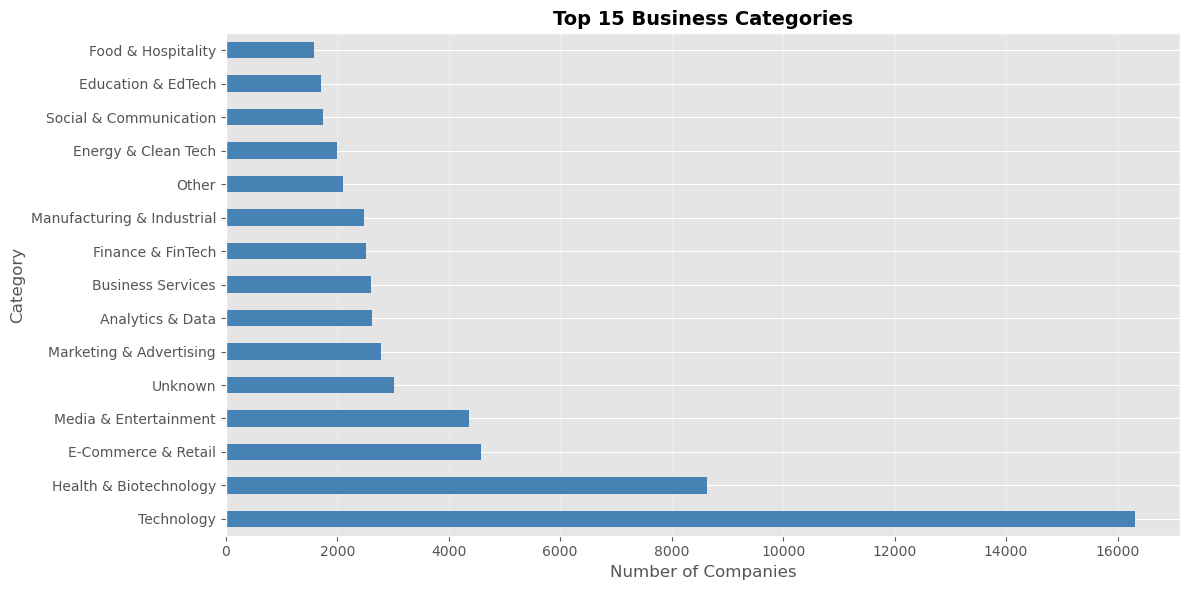

In [10]:
# Visualization 3: Top categories bar chart
plt.figure(figsize=(12, 6))
top_categories.plot(kind='barh', color='steelblue')
plt.title('Top 15 Business Categories', fontsize=14, fontweight='bold')
plt.xlabel('Number of Companies', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## Which Category is Most Successful

**Goal:** We want to see which business type has most companies that got acquired or did IPO

In [11]:
# Filter successful companies
successful = df[df['status'].isin(['acquired', 'ipo'])]
success_by_category = successful['category'].value_counts().head(15)
print("Categories with most successful exits:")
print(success_by_category)

Categories with most successful exits:
category
Technology                    2195
Health & Biotechnology        1214
Media & Entertainment          439
Marketing & Advertising        421
E-Commerce & Retail            331
Manufacturing & Industrial     315
Analytics & Data               268
Business Services              229
Finance & FinTech              203
Security & Cybersecurity       192
Energy & Clean Tech            189
Social & Communication         177
Other                          134
Unknown                        131
Education & EdTech              93
Name: count, dtype: int64


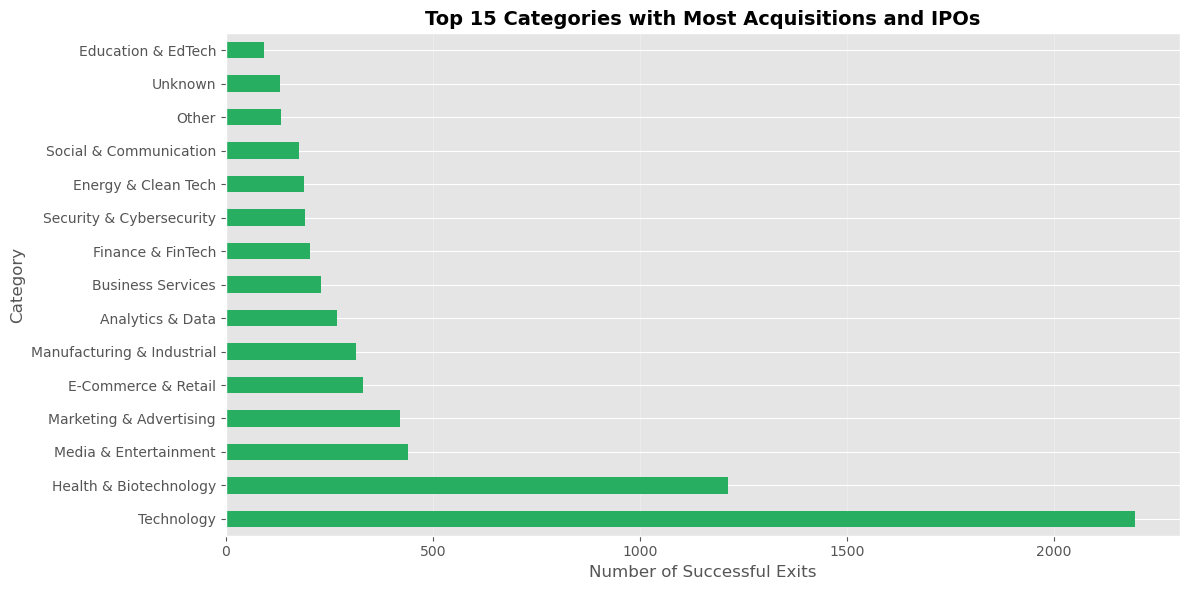

In [12]:
# Visualization 4: Success by category
plt.figure(figsize=(12, 6))
success_by_category.plot(kind='barh', color='#27ae60')
plt.title('Top 15 Categories with Most Acquisitions and IPOs', fontsize=14, fontweight='bold')
plt.xlabel('Number of Successful Exits', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## Comparing Status Across Categories

**Goal:** We want to compare how different business types perform in terms of status

In [13]:
# Get top 10 categories
top_10_cats = df['category'].value_counts().head(10).index
df_top_cats = df[df['category'].isin(top_10_cats)]

# Create crosstab
category_status = pd.crosstab(df_top_cats['category'], df_top_cats['status'])
category_status

status,acquired,closed,ipo,operating
category,,,,
Analytics & Data,236,118,32,2244
Business Services,179,211,50,2174
E-Commerce & Retail,264,346,67,3906
Finance & FinTech,149,236,54,2071
Health & Biotechnology,610,518,604,6893
Manufacturing & Industrial,214,181,101,1986
Marketing & Advertising,377,270,44,2101
Media & Entertainment,378,452,61,3471
Technology,1933,1525,262,12585


<Figure size 1400x600 with 0 Axes>

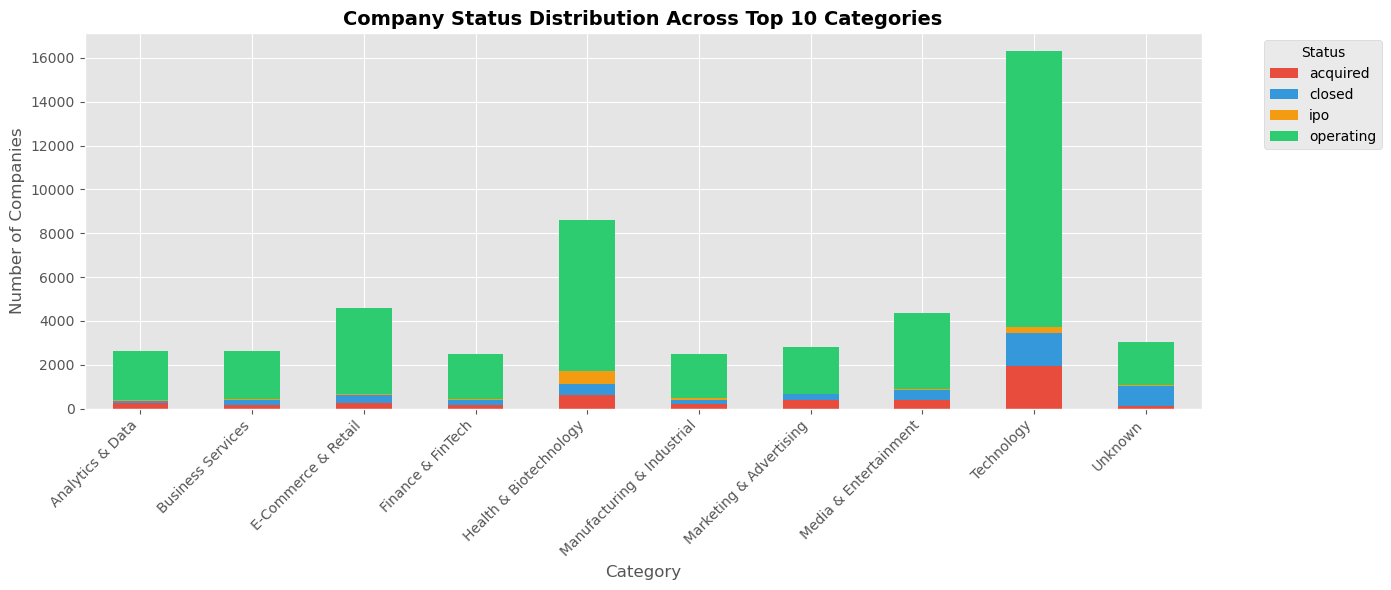

In [14]:
# Visualization 5: Stacked bar chart
plt.figure(figsize=(14, 6))
category_status.plot(kind='bar', stacked=True, figsize=(14, 6), 
                      color=['#e74c3c', '#3498db', '#f39c12', '#2ecc71'])
plt.title('Company Status Distribution Across Top 10 Categories', fontsize=14, fontweight='bold')
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of Companies', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Looking at Countries

**Goal:** We want to see which countries have most startups

In [15]:
# Top 15 countries
top_countries = df['country_code'].value_counts().head(15)
print("Top 15 Countries:")
print(top_countries)

Top 15 Countries:
country_code
USA        35551
Unknown     6571
GBR         3461
CAN         1818
IND         1536
CHN         1494
FRA         1079
DEU          994
ISR          913
ESP          682
AUS          464
NLD          462
SWE          443
RUS          430
SGP          411
Name: count, dtype: int64


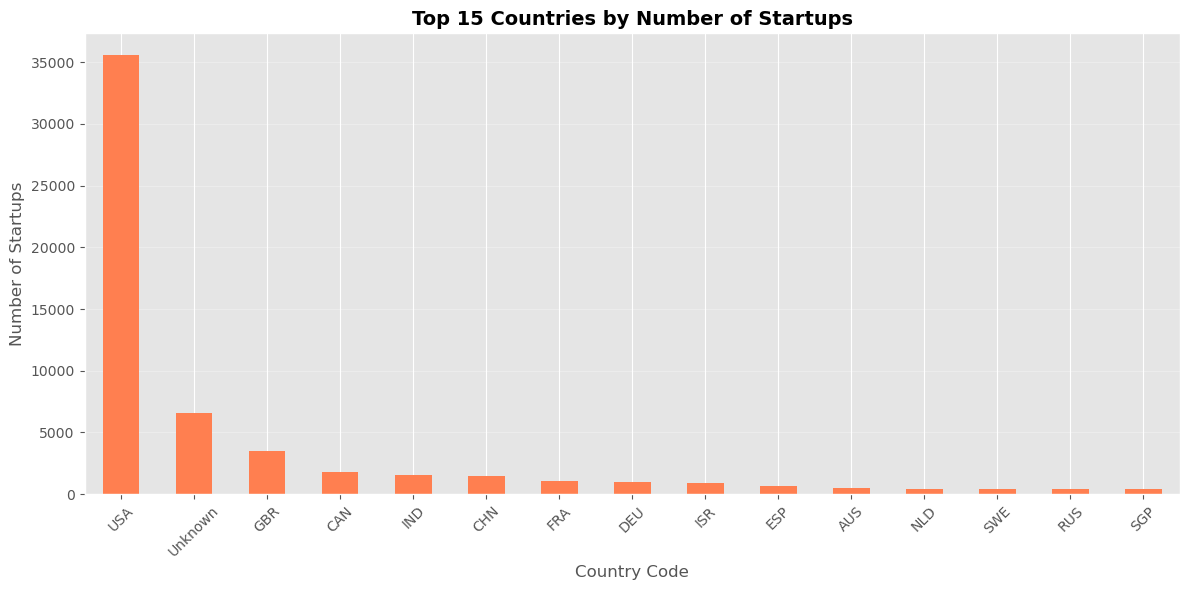

In [16]:
# Visualization 6: Countries bar chart
plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar', color='coral')
plt.title('Top 15 Countries by Number of Startups', fontsize=14, fontweight='bold')
plt.xlabel('Country Code', fontsize=12)
plt.ylabel('Number of Startups', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## Top Cities for Startups

**Goal:** We want to find which cities are startup hubs

In [17]:
# Top 20 cities
top_cities = df['city'].value_counts().head(20)
print("Top 20 Cities:")
print(top_cities)

Top 20 Cities:
city
Unknown          6606
San Francisco    3286
New York         2954
London           1894
Austin            747
Palo Alto         711
Seattle           706
Los Angeles       695
Beijing           693
Cambridge         658
Chicago           654
Boston            626
San Diego         600
Paris             574
Mountain View     557
Toronto           507
San Jose          452
Sunnyvale         433
Atlanta           410
Tel Aviv          403
Name: count, dtype: int64


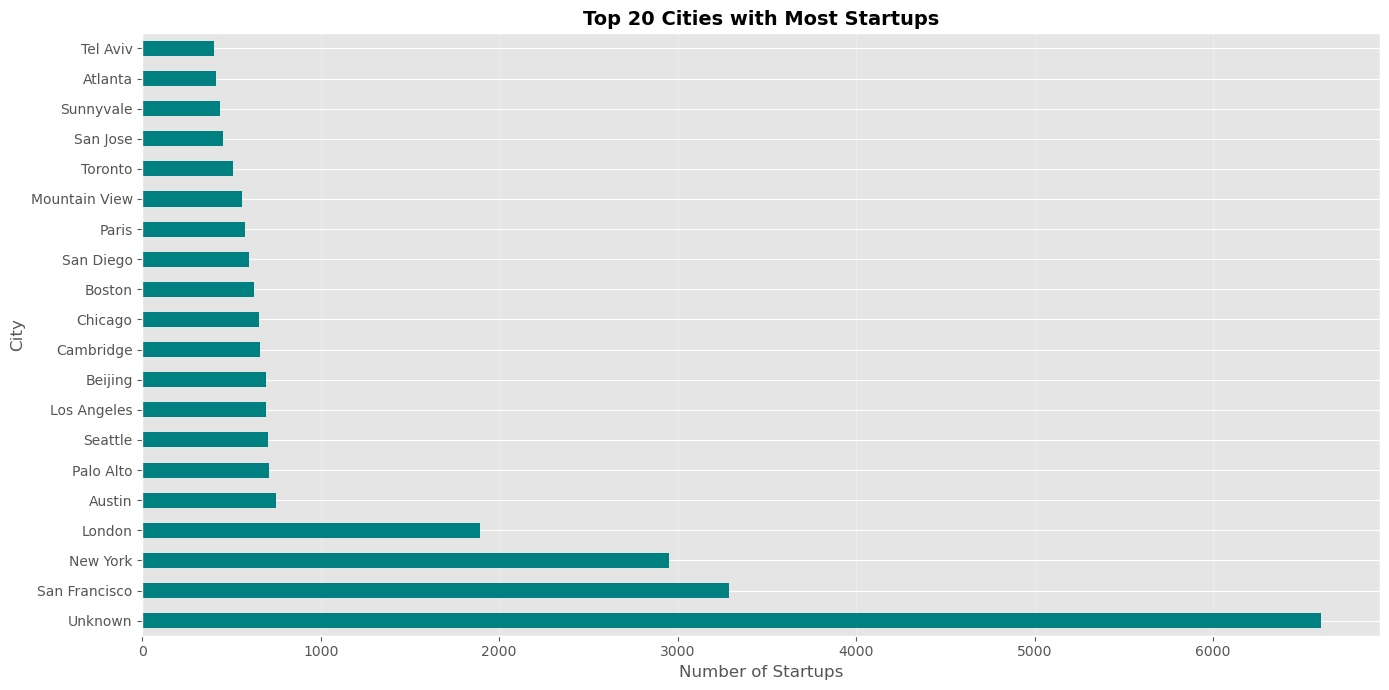

In [18]:
# Visualization 7: Top cities
plt.figure(figsize=(14, 7))
top_cities.plot(kind='barh', color='teal')
plt.title('Top 20 Cities with Most Startups', fontsize=14, fontweight='bold')
plt.xlabel('Number of Startups', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## Analyzing Funding Amounts

**Goal:** We want to understand how much money startups raise

In [19]:
# Remove zero and null funding
df_funded = df[df['funding_total_usd'] > 0].copy()

print(f"Companies with funding: {len(df_funded)}")
print(f"\nFunding Statistics:")
print(f"Average funding: ${df_funded['funding_total_usd'].mean():,.2f}")
print(f"Median funding: ${df_funded['funding_total_usd'].median():,.2f}")
print(f"Max funding: ${df_funded['funding_total_usd'].max():,.2f}")
print(f"Min funding: ${df_funded['funding_total_usd'].min():,.2f}")

Companies with funding: 62497

Funding Statistics:
Average funding: $15,581,933.75
Median funding: $1,500,000.00
Max funding: $30,079,503,000.00
Min funding: $1.00


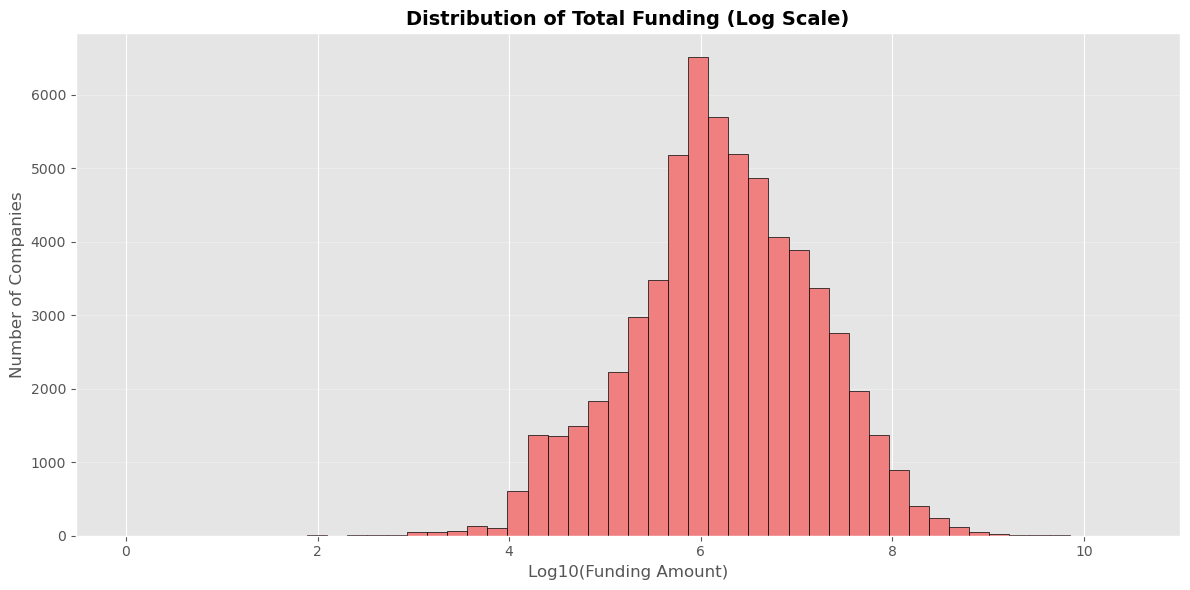

In [ ]:
# Visualization 8:Log scale for better view
plt.figure(figsize=(12, 6))
plt.hist(np.log10(df_funded['funding_total_usd']), bins=50, color='lightcoral', edgecolor='black')
plt.title('Distribution of Total Funding (Log Scale)', fontsize=14, fontweight='bold')
plt.xlabel('Log10(Funding Amount)', fontsize=12)
plt.ylabel('Number of Companies', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## Funding by Status

**Goal:** We want to see if successful companies raise more money

In [22]:
# Average funding by status
funding_by_status = df_funded.groupby('status')['funding_total_usd'].agg(['mean', 'median', 'count'])
funding_by_status

,mean,median,count
status,,,
acquired,2.421250e+07,9000000.0,5272
closed,9.605773e+06,1400000.0,5783
ipo,1.385694e+08,26950000.0,1498
operating,1.167405e+07,1300000.0,49944


<Figure size 1200x600 with 0 Axes>

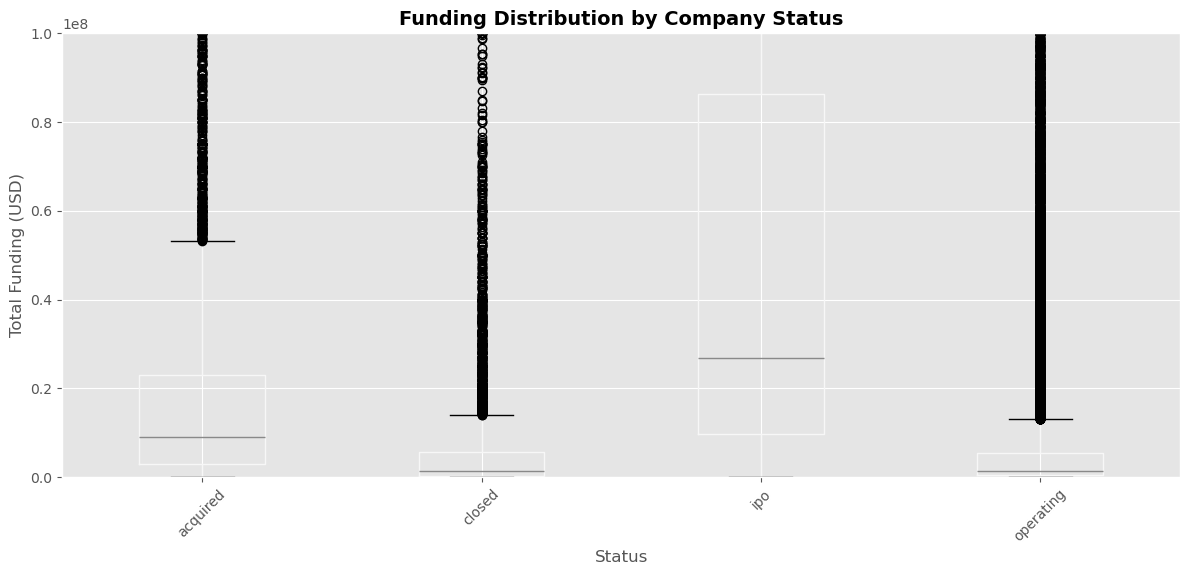

In [23]:
# Visualization 10: Box plot of funding by status
plt.figure(figsize=(12, 6))
df_funded.boxplot(column='funding_total_usd', by='status', figsize=(12, 6))
plt.title('Funding Distribution by Company Status', fontsize=14, fontweight='bold')
plt.suptitle('')  # Remove default title
plt.xlabel('Status', fontsize=12)
plt.ylabel('Total Funding (USD)', fontsize=12)
plt.ylim(0, 100000000)  # Focus on lower range
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

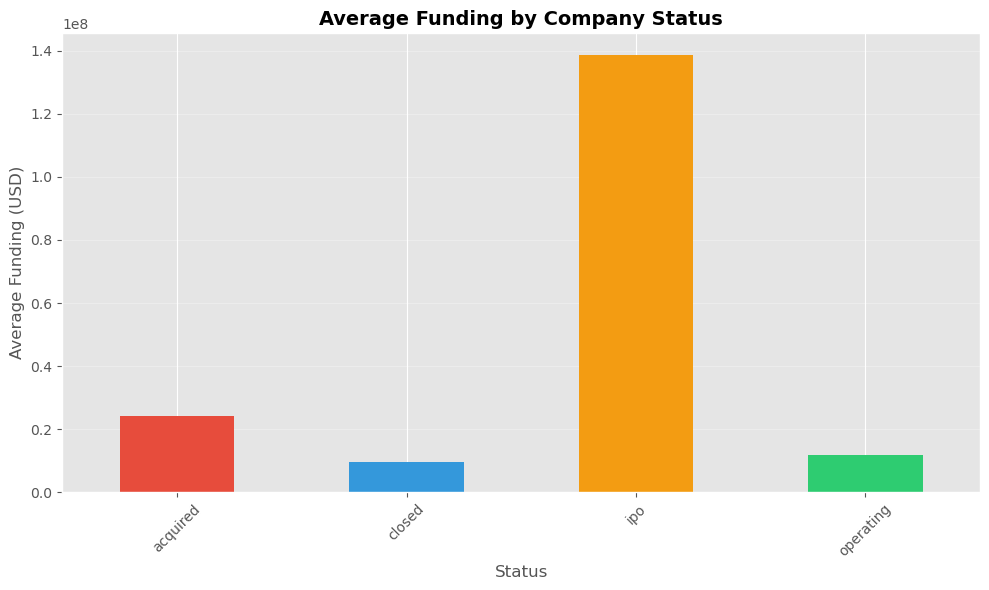

In [ ]:
# Visualization 10: Average funding by status
plt.figure(figsize=(10, 6))
funding_by_status['mean'].plot(kind='bar', color=['#e74c3c', '#3498db', '#f39c12', '#2ecc71'])
plt.title('Average Funding by Company Status', fontsize=14, fontweight='bold')
plt.xlabel('Status', fontsize=12)
plt.ylabel('Average Funding (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## Funding Rounds Analysis

**Goal:** We want to see how many funding rounds companies typically go through

In [25]:
# Funding rounds distribution
rounds_dist = df[df['funding_rounds'] > 0]['funding_rounds'].value_counts().sort_index()
print("Distribution of funding rounds:")
print(rounds_dist.head(10))

Distribution of funding rounds:
funding_rounds
1     40400
2     11533
3      5153
4      2511
5      1347
6       692
7       376
8       193
9       115
10       73
Name: count, dtype: int64


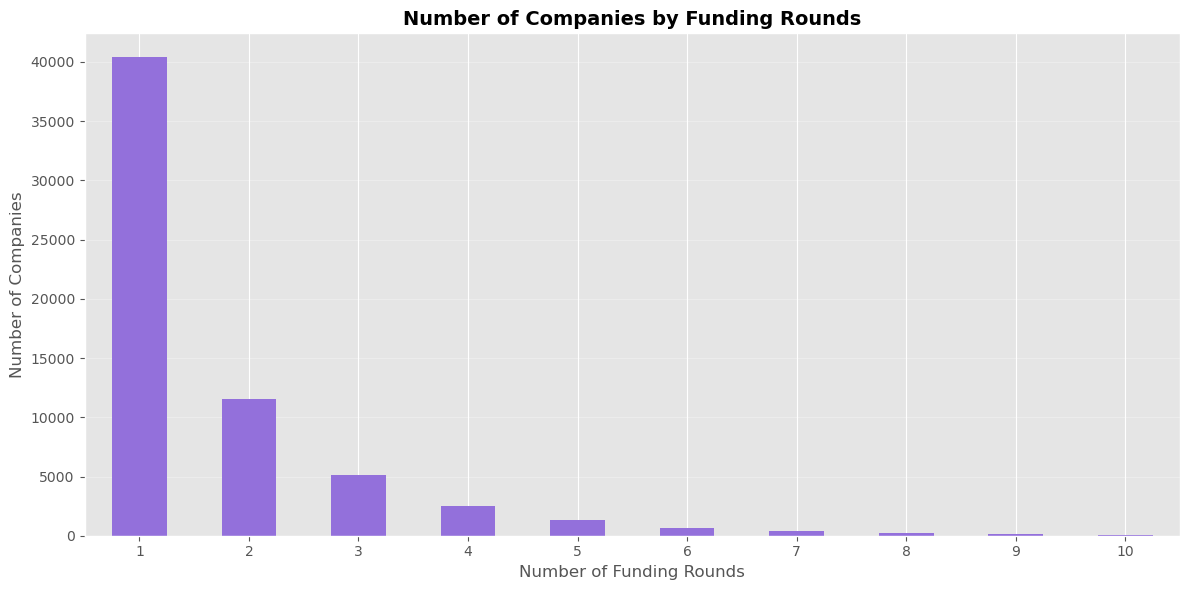

In [ ]:
# Visualization 11: Funding rounds distribution
plt.figure(figsize=(12, 6))
rounds_dist.head(10).plot(kind='bar', color='mediumpurple')
plt.title('Number of Companies by Funding Rounds', fontsize=14, fontweight='bold')
plt.xlabel('Number of Funding Rounds', fontsize=12)
plt.ylabel('Number of Companies', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## Funding Rounds vs Status

**Goal:** We want to check if more funding rounds means better success

In [27]:
# Average rounds by status
rounds_by_status = df[df['funding_rounds'] > 0].groupby('status')['funding_rounds'].agg(['mean', 'median'])
print(rounds_by_status)

               mean  median
status                     
acquired   2.084598     2.0
closed     1.392357     1.0
ipo        2.769025     2.0
operating  1.679922     1.0


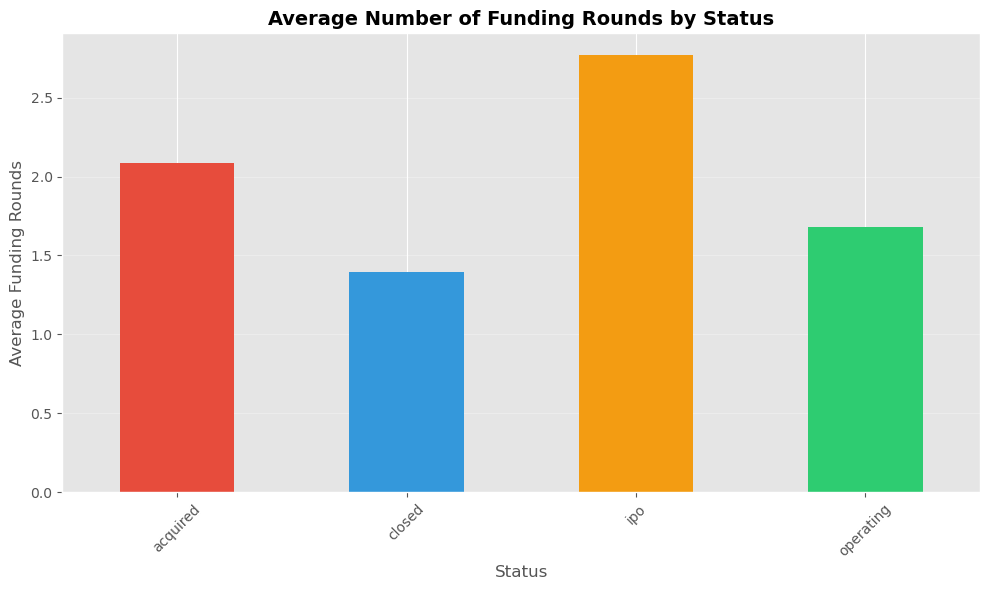

In [28]:
# Visualization 13: Average rounds by status
plt.figure(figsize=(10, 6))
rounds_by_status['mean'].plot(kind='bar', color=['#e74c3c', '#3498db', '#f39c12', '#2ecc71'])
plt.title('Average Number of Funding Rounds by Status', fontsize=14, fontweight='bold')
plt.xlabel('Status', fontsize=12)
plt.ylabel('Average Funding Rounds', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## Top Funded Categories

**Goal:** We want to find which business categories get most funding

In [29]:
# Average funding by category
funding_by_category = df_funded.groupby('category')['funding_total_usd'].agg(['mean', 'sum', 'count'])
funding_by_category = funding_by_category[funding_by_category['count'] >= 50]  # At least 50 companies
top_funded_cats = funding_by_category.nlargest(15, 'mean')
top_funded_cats

,mean,sum,count
category,,,
Energy & Clean Tech,3.465001e+07,6.940396e+10,2003
Transportation & Automotive,2.854222e+07,3.296627e+10,1155
Manufacturing & Industrial,2.329605e+07,5.782080e+10,2482
Finance & FinTech,2.256248e+07,5.663183e+10,2510
Health & Biotechnology,2.098250e+07,1.809740e+11,8625
Agriculture & Environment,1.908109e+07,6.239517e+09,327
Security & Cybersecurity,1.755147e+07,1.637552e+10,933
E-Commerce & Retail,1.613904e+07,7.396524e+10,4583
Real Estate & Construction,1.560352e+07,1.619645e+10,1038


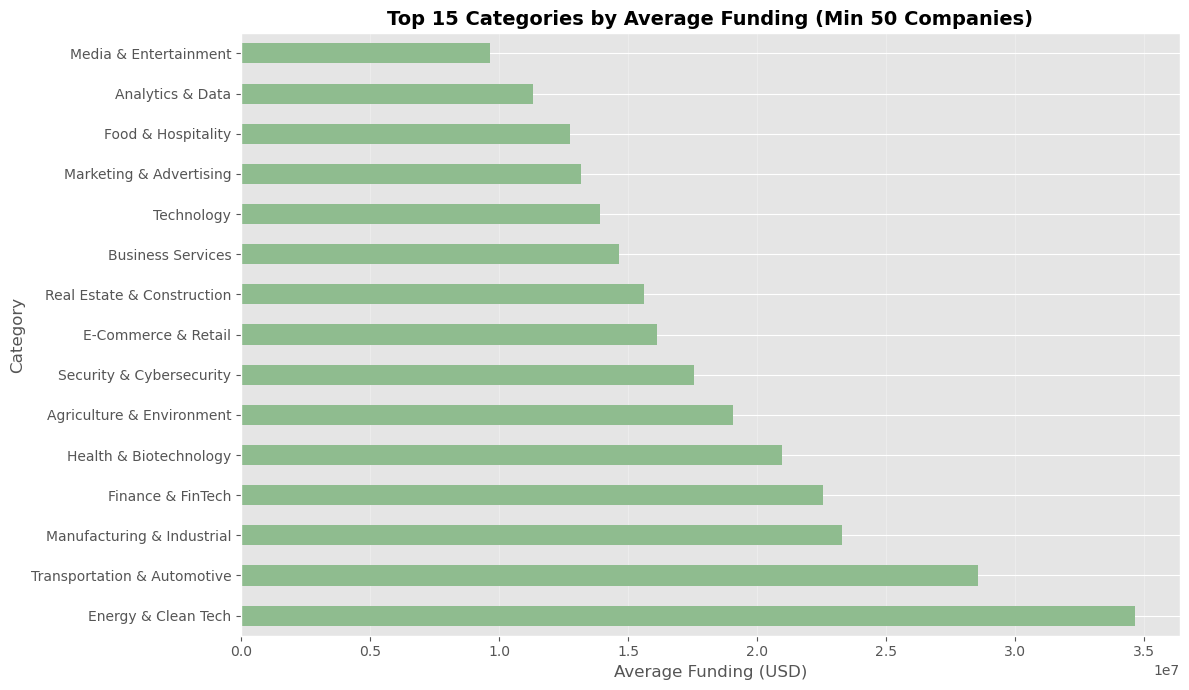

In [30]:
# Visualization 14: Top funded categories
plt.figure(figsize=(12, 7))
top_funded_cats['mean'].plot(kind='barh', color='darkseagreen')
plt.title('Top 15 Categories by Average Funding (Min 50 Companies)', fontsize=14, fontweight='bold')
plt.xlabel('Average Funding (USD)', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## Top Funded Countries

**Goal:** We want to see which countries have highest average funding

In [31]:
# Average funding by country
funding_by_country = df_funded.groupby('country_code')['funding_total_usd'].agg(['mean', 'sum', 'count'])
funding_by_country = funding_by_country[funding_by_country['count'] >= 100]  # At least 100 companies
top_funded_countries = funding_by_country.nlargest(15, 'mean')
top_funded_countries

,mean,sum,count
country_code,,,
CHN,5.267785e+07,7.870071e+10,1494
RUS,2.600539e+07,1.118232e+10,430
IND,1.854427e+07,2.848400e+10,1536
USA,1.807435e+07,6.425613e+11,35551
NLD,1.421035e+07,6.565183e+09,462
CHE,1.416506e+07,4.377004e+09,309
JPN,1.364201e+07,5.388592e+09,395
HKG,1.212347e+07,2.351954e+09,194
NOR,1.176316e+07,1.517447e+09,129


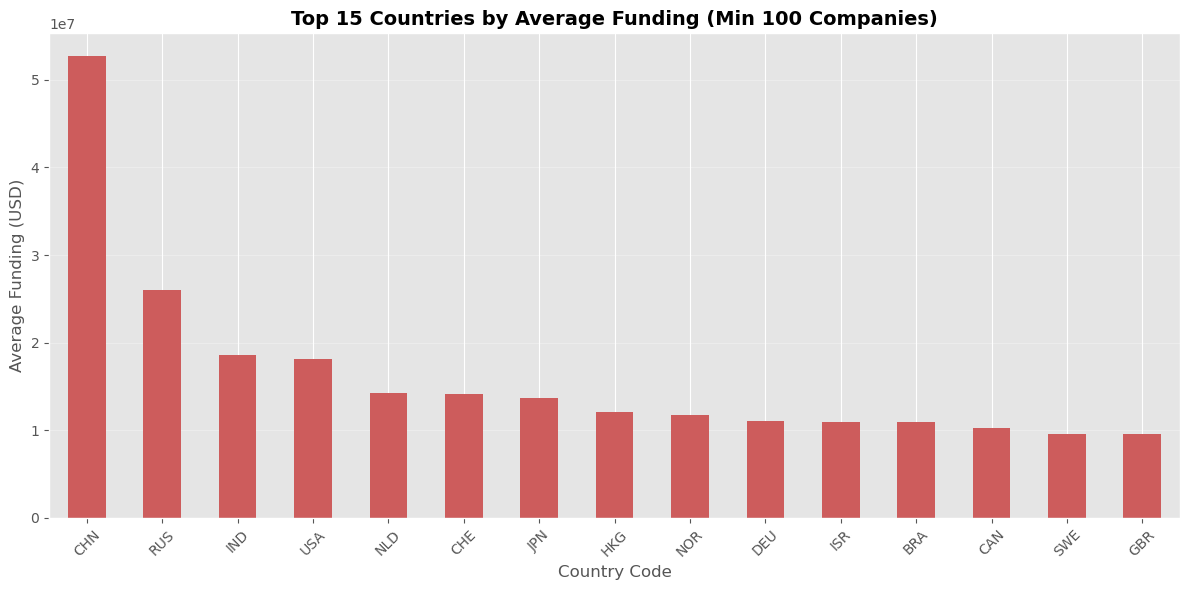

In [32]:
# Visualization 15: Top funded countries
plt.figure(figsize=(12, 6))
top_funded_countries['mean'].plot(kind='bar', color='indianred')
plt.title('Top 15 Countries by Average Funding (Min 100 Companies)', fontsize=14, fontweight='bold')
plt.xlabel('Country Code', fontsize=12)
plt.ylabel('Average Funding (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## When Were Companies Founded

**Goal:** We want to see trends in startup creation over years

In [33]:
# Convert to datetime
df['founded_year'] = pd.to_datetime(df['founded_at'], errors='coerce').dt.year

# Filter reasonable years
df_years = df[(df['founded_year'] >= 1990) & (df['founded_year'] <= 2020)]

# Count by year
founded_by_year = df_years['founded_year'].value_counts().sort_index()
founded_by_year.head(10)

founded_year
1990     118
1991     119
1992     150
1993     180
1994     200
1995     277
1996     416
1997     521
1998     855
1999    1198
Name: count, dtype: int64

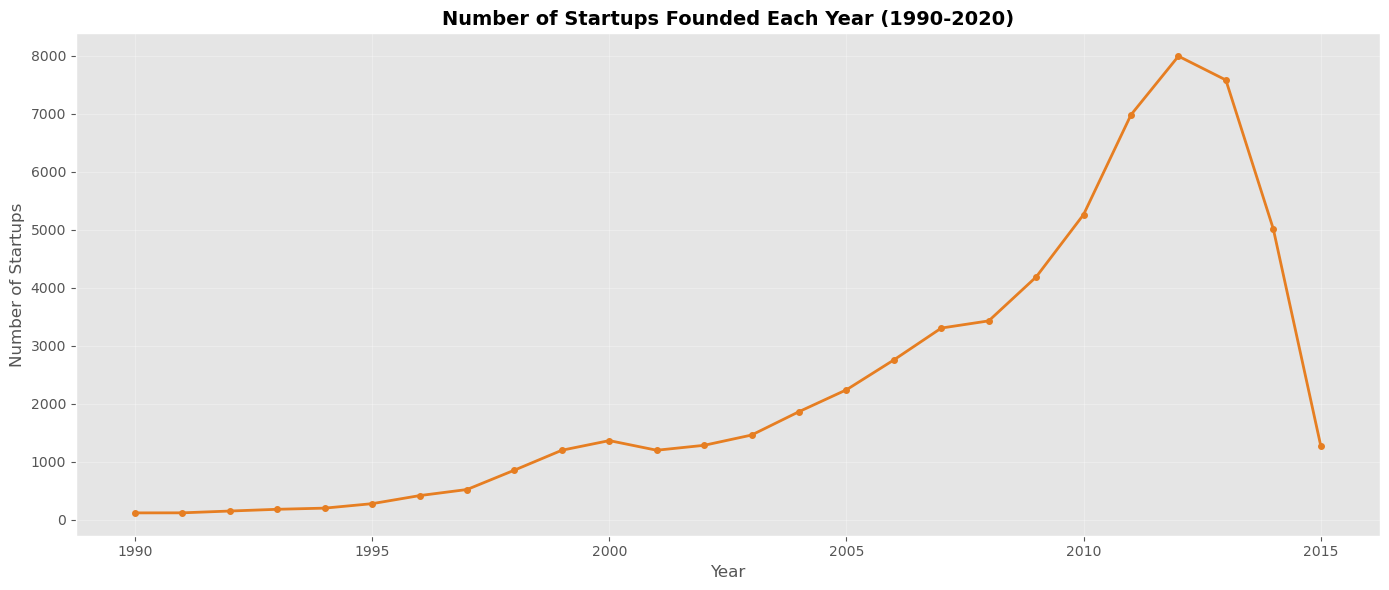

In [34]:
# Visualization 16: Startups founded over time
plt.figure(figsize=(14, 6))
plt.plot(founded_by_year.index, founded_by_year.values, marker='o', linewidth=2, markersize=4, color='#e67e22')
plt.title('Number of Startups Founded Each Year (1990-2020)', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Startups', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Success Rate Over Years

**Goal:** We want to check if older companies are more successful

In [35]:
# Group by year and status
year_status = df_years.groupby(['founded_year', 'status']).size().unstack(fill_value=0)

# Calculate percentage of successful companies
year_status['total'] = year_status.sum(axis=1)
year_status['success_rate'] = ((year_status['acquired'] + year_status['ipo']) / year_status['total'] * 100)

year_status[['success_rate']].tail(15)

status,success_rate
founded_year,
2001,28.046745
2002,23.382697
2003,21.027397
2004,21.524423
2005,18.437500
2006,15.753176
2007,14.830508
2008,10.705951
2009,9.629630


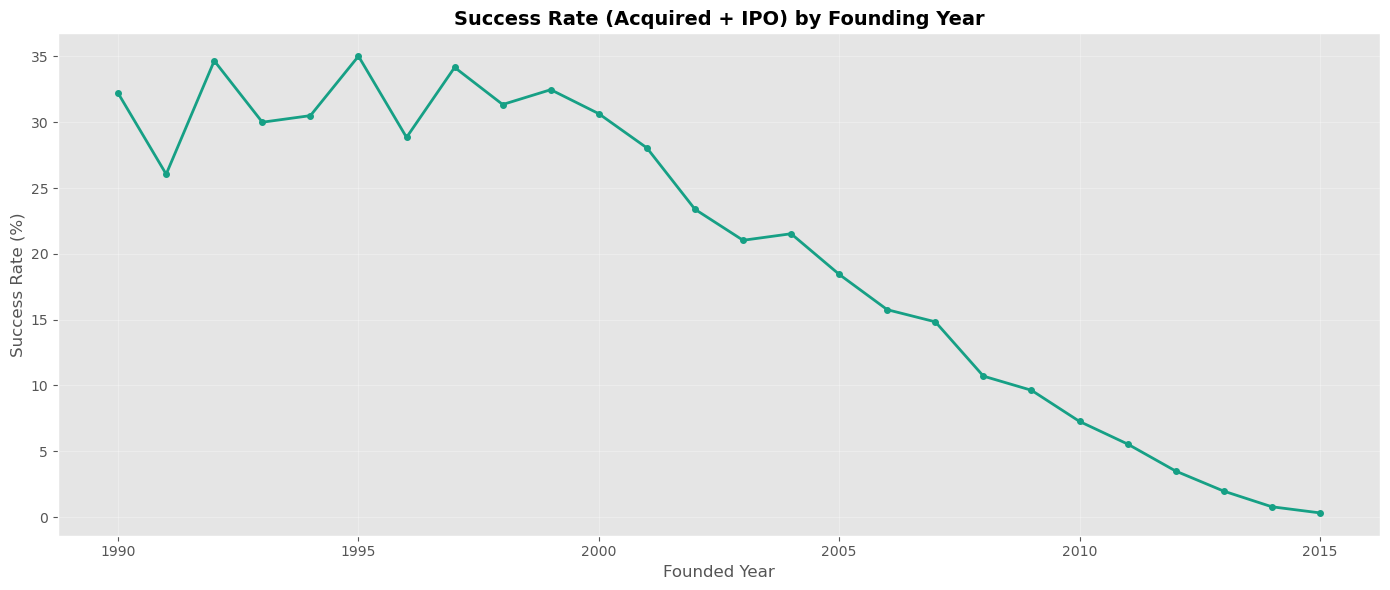

In [36]:
# Visualization 17: Success rate over time
plt.figure(figsize=(14, 6))
plt.plot(year_status.index, year_status['success_rate'], marker='o', linewidth=2, markersize=4, color='#16a085')
plt.title('Success Rate (Acquired + IPO) by Founding Year', fontsize=14, fontweight='bold')
plt.xlabel('Founded Year', fontsize=12)
plt.ylabel('Success Rate (%)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Relationship Between Funding and Success

**Goal:** We want to see if more funding leads to better outcomes

In [37]:
# Create funding bins
df_funded['funding_bin'] = pd.cut(df_funded['funding_total_usd'], 
                                    bins=[0, 1000000, 10000000, 50000000, float('inf')],
                                    labels=['Under 1M', '1M-10M', '10M-50M', 'Above 50M'])

# Status distribution by funding bin
funding_status = pd.crosstab(df_funded['funding_bin'], df_funded['status'], normalize='index') * 100
funding_status

status,acquired,closed,ipo,operating
funding_bin,,,,
Under 1M,2.249048,9.499827,0.215294,88.035831
1M-10M,9.672266,9.931344,1.485384,78.911007
10M-50M,19.552101,8.170570,5.389099,66.888230
Above 50M,15.078918,6.003382,16.093574,62.824126


<Figure size 1200x600 with 0 Axes>

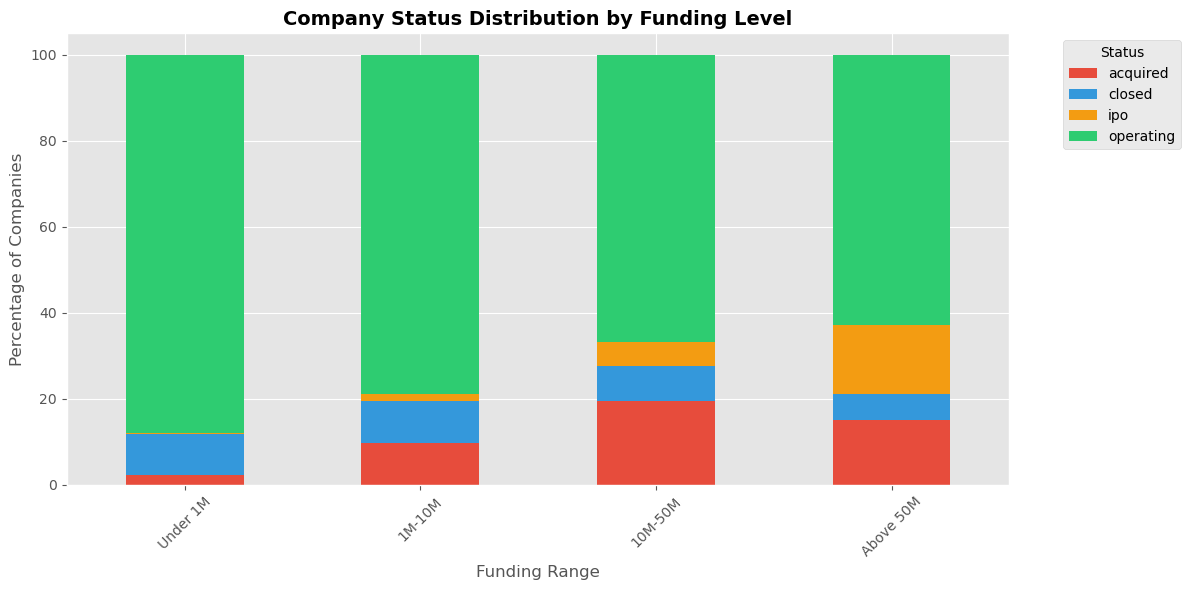

In [38]:
# Visualization 18: Status by funding level
plt.figure(figsize=(12, 6))
funding_status.plot(kind='bar', stacked=True, figsize=(12, 6),
                    color=['#e74c3c', '#3498db', '#f39c12', '#2ecc71'])
plt.title('Company Status Distribution by Funding Level', fontsize=14, fontweight='bold')
plt.xlabel('Funding Range', fontsize=12)
plt.ylabel('Percentage of Companies', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Comparing Top Countries

**Goal:** We want to compare USA, China, UK and India startups

In [39]:
# Select top countries
top_4_countries = ['USA', 'CHN', 'GBR', 'IND']
df_top4 = df[df['country_code'].isin(top_4_countries)]

# Status distribution
country_status = pd.crosstab(df_top4['country_code'], df_top4['status'], normalize='index') * 100
country_status

status,acquired,closed,ipo,operating
country_code,,,,
CHN,2.008032,4.216867,5.153949,88.621151
GBR,6.154291,7.425600,0.895695,85.524415
IND,3.125000,3.906250,0.716146,92.252604
USA,11.107986,7.617226,3.018199,78.256589


<Figure size 1200x600 with 0 Axes>

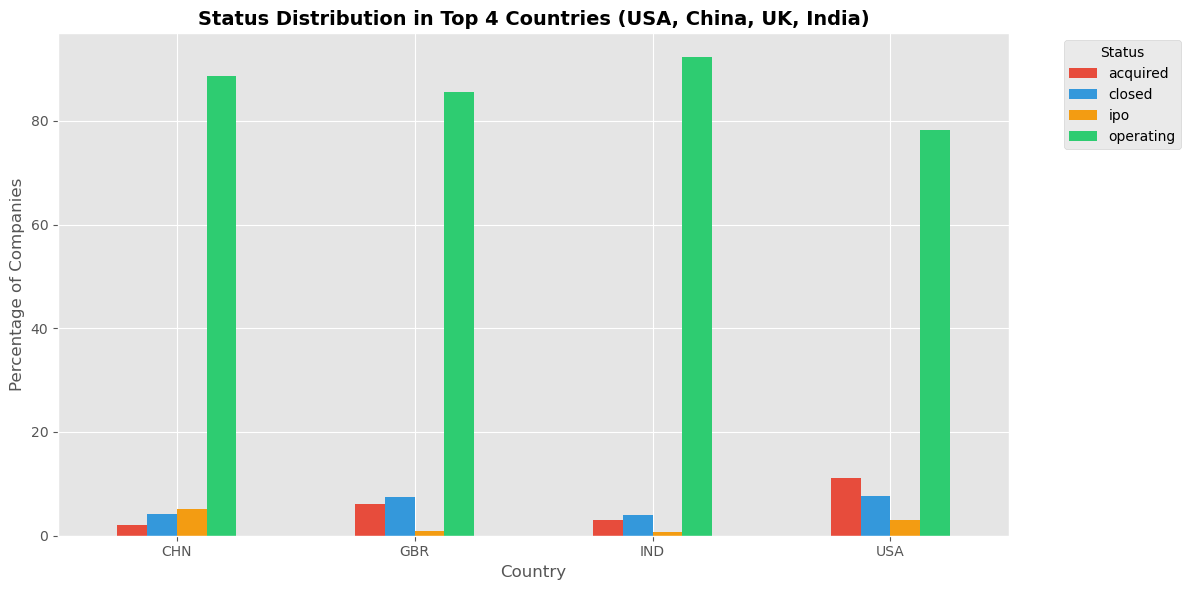

In [40]:
# Visualization 19: Country comparison
plt.figure(figsize=(12, 6))
country_status.plot(kind='bar', figsize=(12, 6),
                    color=['#e74c3c', '#3498db', '#f39c12', '#2ecc71'])
plt.title('Status Distribution in Top 4 Countries (USA, China, UK, India)', fontsize=14, fontweight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Percentage of Companies', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Category Distribution in Top Countries

**Goal:** We want to see which categories are popular in which countries

In [41]:
# Top 5 categories in each country
for country in top_4_countries:
    print(f"\nTop 5 categories in {country}:")
    top_cats = df_top4[df_top4['country_code'] == country]['category'].value_counts().head(5)
    print(top_cats)


Top 5 categories in USA:
category
Technology                 9580
Health & Biotechnology     6243
Media & Entertainment      2236
E-Commerce & Retail        2088
Marketing & Advertising    1643
Name: count, dtype: int64

Top 5 categories in CHN:
category
Technology                    378
E-Commerce & Retail           196
Media & Entertainment         145
Manufacturing & Industrial    113
Health & Biotechnology        102
Name: count, dtype: int64

Top 5 categories in GBR:
category
Technology                 907
Health & Biotechnology     389
E-Commerce & Retail        282
Media & Entertainment      256
Marketing & Advertising    169
Name: count, dtype: int64

Top 5 categories in IND:
category
Technology                345
E-Commerce & Retail       231
Education & EdTech         99
Health & Biotechnology     92
Food & Hospitality         88
Name: count, dtype: int64


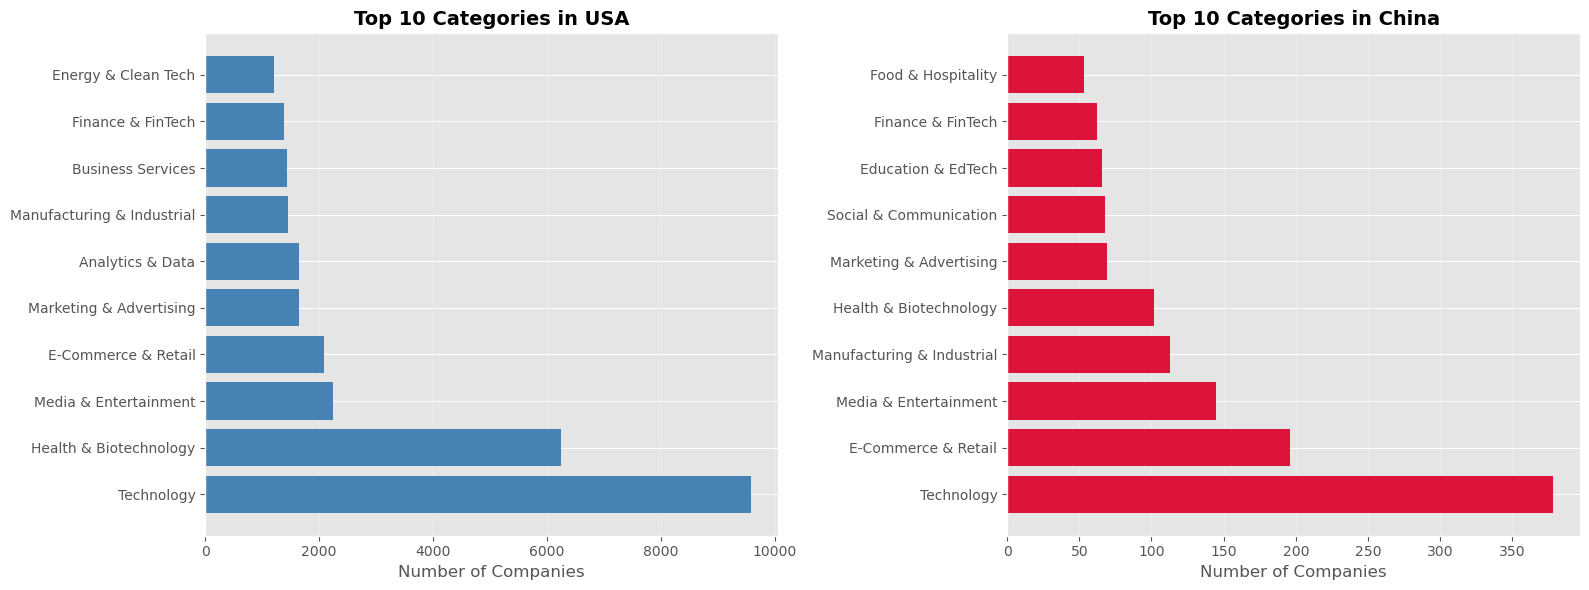

In [42]:
# Visualization 20: Category distribution in USA vs China
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# USA
usa_cats = df_top4[df_top4['country_code'] == 'USA']['category'].value_counts().head(10)
axes[0].barh(range(len(usa_cats)), usa_cats.values, color='steelblue')
axes[0].set_yticks(range(len(usa_cats)))
axes[0].set_yticklabels(usa_cats.index)
axes[0].set_xlabel('Number of Companies', fontsize=12)
axes[0].set_title('Top 10 Categories in USA', fontsize=14, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)

# China
chn_cats = df_top4[df_top4['country_code'] == 'CHN']['category'].value_counts().head(10)
axes[1].barh(range(len(chn_cats)), chn_cats.values, color='crimson')
axes[1].set_yticks(range(len(chn_cats)))
axes[1].set_yticklabels(chn_cats.index)
axes[1].set_xlabel('Number of Companies', fontsize=12)
axes[1].set_title('Top 10 Categories in China', fontsize=14, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

## Regional Analysis

**Goal:** We want to see which regions have most startups

In [43]:
# Top regions
top_regions = df['region'].value_counts().head(20)
print("Top 20 Regions:")
print(top_regions)

Top 20 Regions:
region
SF Bay Area         8287
Unknown             6607
New York City       3285
London              2309
Boston              2302
Los Angeles         1730
Seattle             1142
Washington, D.C.     987
Chicago              930
San Diego            867
Denver               811
Austin               798
Tel Aviv             784
Toronto              712
Beijing              693
Paris                648
Atlanta              638
Dallas               583
Newark               564
Philadelphia         533
Name: count, dtype: int64


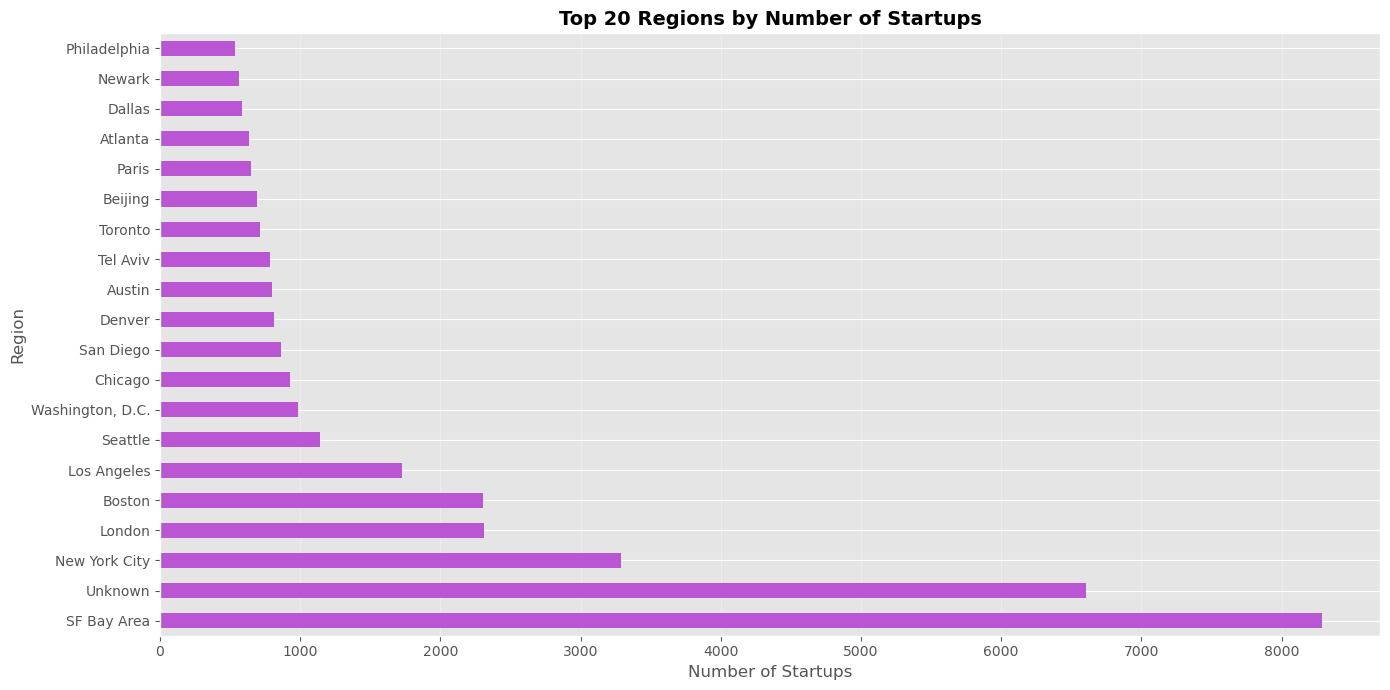

In [44]:
# Visualization 21: Top regions
plt.figure(figsize=(14, 7))
top_regions.plot(kind='barh', color='mediumorchid')
plt.title('Top 20 Regions by Number of Startups', fontsize=14, fontweight='bold')
plt.xlabel('Number of Startups', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()